In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate,cross_val_score  
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
df=pd.read_csv('480337_637209277760314652_train.csv')

In [3]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,y
0,3.0,-0.183355,-4.634184,1.184842,5.470261,3.672736,-4.030212,2.689942,8.962724,2.484879,...,-15.994611,15.024532,23.204973,2.528437,8.962604,0.266541,-1.383385,-1.029273,1.711146,1.0
1,2.0,1.643093,0.232917,-3.235598,-0.082242,-6.190242,-2.308474,-0.968020,-5.374390,2.460543,...,22.711908,45.220479,-0.635627,22.675962,32.937243,-1.082314,0.571426,-0.063689,-3.122653,1.0
2,1.0,0.812938,0.095642,-1.170322,-1.808930,-2.618295,1.613534,-5.186820,-0.011963,3.381312,...,-3.333037,-8.586271,-3.326587,5.033094,-5.385510,-1.281024,-0.788055,0.505804,-0.891985,0.0
3,2.0,-0.250723,0.011880,2.086732,-2.476512,-0.265453,4.399695,-0.159362,0.674294,-7.503565,...,4.438590,9.183342,7.087640,25.453062,12.087652,-0.613746,0.141558,-0.206084,0.538862,0.0
4,2.0,1.215325,1.675581,2.193322,2.983158,0.007759,2.983193,2.731582,2.418476,-6.947729,...,-21.198210,19.839208,9.945454,13.003429,-10.114149,-0.111361,-0.954487,0.825140,1.437519,1.0


In [ ]:
df['x1'].unique()

In [ ]:
dum=pd.get_dummies(df['x1'])

In [ ]:
df=pd.concat((df,dum), axis=1)

df.pop('x1')

In [106]:
df.shape

(30000, 28)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
x2     30000 non-null float64
x3     30000 non-null float64
x4     30000 non-null float64
x5     30000 non-null float64
x6     30000 non-null float64
x7     30000 non-null float64
x8     30000 non-null float64
x9     30000 non-null float64
x10    30000 non-null float64
x11    30000 non-null float64
x12    30000 non-null float64
x13    30000 non-null float64
x14    30000 non-null float64
x15    30000 non-null float64
x16    30000 non-null float64
x17    30000 non-null float64
x18    30000 non-null float64
x19    30000 non-null float64
x20    30000 non-null float64
x21    30000 non-null float64
x22    30000 non-null float64
x23    30000 non-null float64
x24    30000 non-null float64
x25    30000 non-null float64
y      30000 non-null float64
1.0    30000 non-null uint8
2.0    30000 non-null uint8
3.0    30000 non-null uint8
dtypes: float64(25), uint8(3)
memory usage: 5.8 MB


In [104]:
df.describe()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,...,x20,x21,x22,x23,x24,x25,y,1.0,2.0,3.0
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.049272,0.155542,0.264086,0.327877,0.467856,0.540467,0.645905,0.772064,0.855704,0.851044,...,1.912739,2.122779,-0.008287,-0.003695,-0.014306,-0.007142,0.500700,0.447633,0.252133,0.300233
std,0.790037,1.586722,2.370197,3.182403,3.924575,4.748936,5.538706,6.337332,7.163032,7.952620,...,15.058734,15.889472,0.996894,0.997866,0.998303,1.002864,0.500008,0.497258,0.434245,0.458367
min,-4.127232,-7.546048,-11.394922,-15.703917,-17.282928,-21.532381,-29.281607,-30.208977,-34.958885,-39.157085,...,-73.657652,-72.907504,-3.928834,-3.994068,-4.192774,-3.803546,0.000000,0.000000,0.000000,0.000000
25%,-0.422199,-0.775418,-1.125385,-1.530502,-1.814194,-2.246759,-2.614270,-2.988377,-3.323687,-3.791084,...,-6.848749,-7.156391,-0.681687,-0.680071,-0.684913,-0.686482,0.000000,0.000000,0.000000,0.000000
50%,0.032569,0.141492,0.254399,0.329104,0.470329,0.495226,0.630812,0.796000,0.836376,0.803185,...,1.898707,2.144885,-0.009180,-0.003500,-0.013049,-0.004206,1.000000,0.000000,0.000000,0.000000
75%,0.503805,1.076679,1.638515,2.165261,2.768946,3.316882,3.912253,4.491845,5.015648,5.518895,...,10.665602,11.308316,0.666875,0.665890,0.653100,0.667001,1.000000,1.000000,1.000000,1.000000
max,3.768093,7.606813,12.314023,14.647326,23.133919,24.032719,27.760556,32.032490,36.809509,43.898928,...,68.661508,77.972068,3.581391,4.616384,3.815528,4.014202,1.000000,1.000000,1.000000,1.000000


In [4]:
df.hist(figsize=(15,20),bins = 50,xlabelsize=8,ylabelsize =8)
plt.show()

array([3., 2., 1.])

In [10]:
df.isnull().values.any()

False

In [11]:
df.iloc[:,:-4].columns

Index(['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25'],
      dtype='object')

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 50, 50

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2601a748>,
      dtype=object)

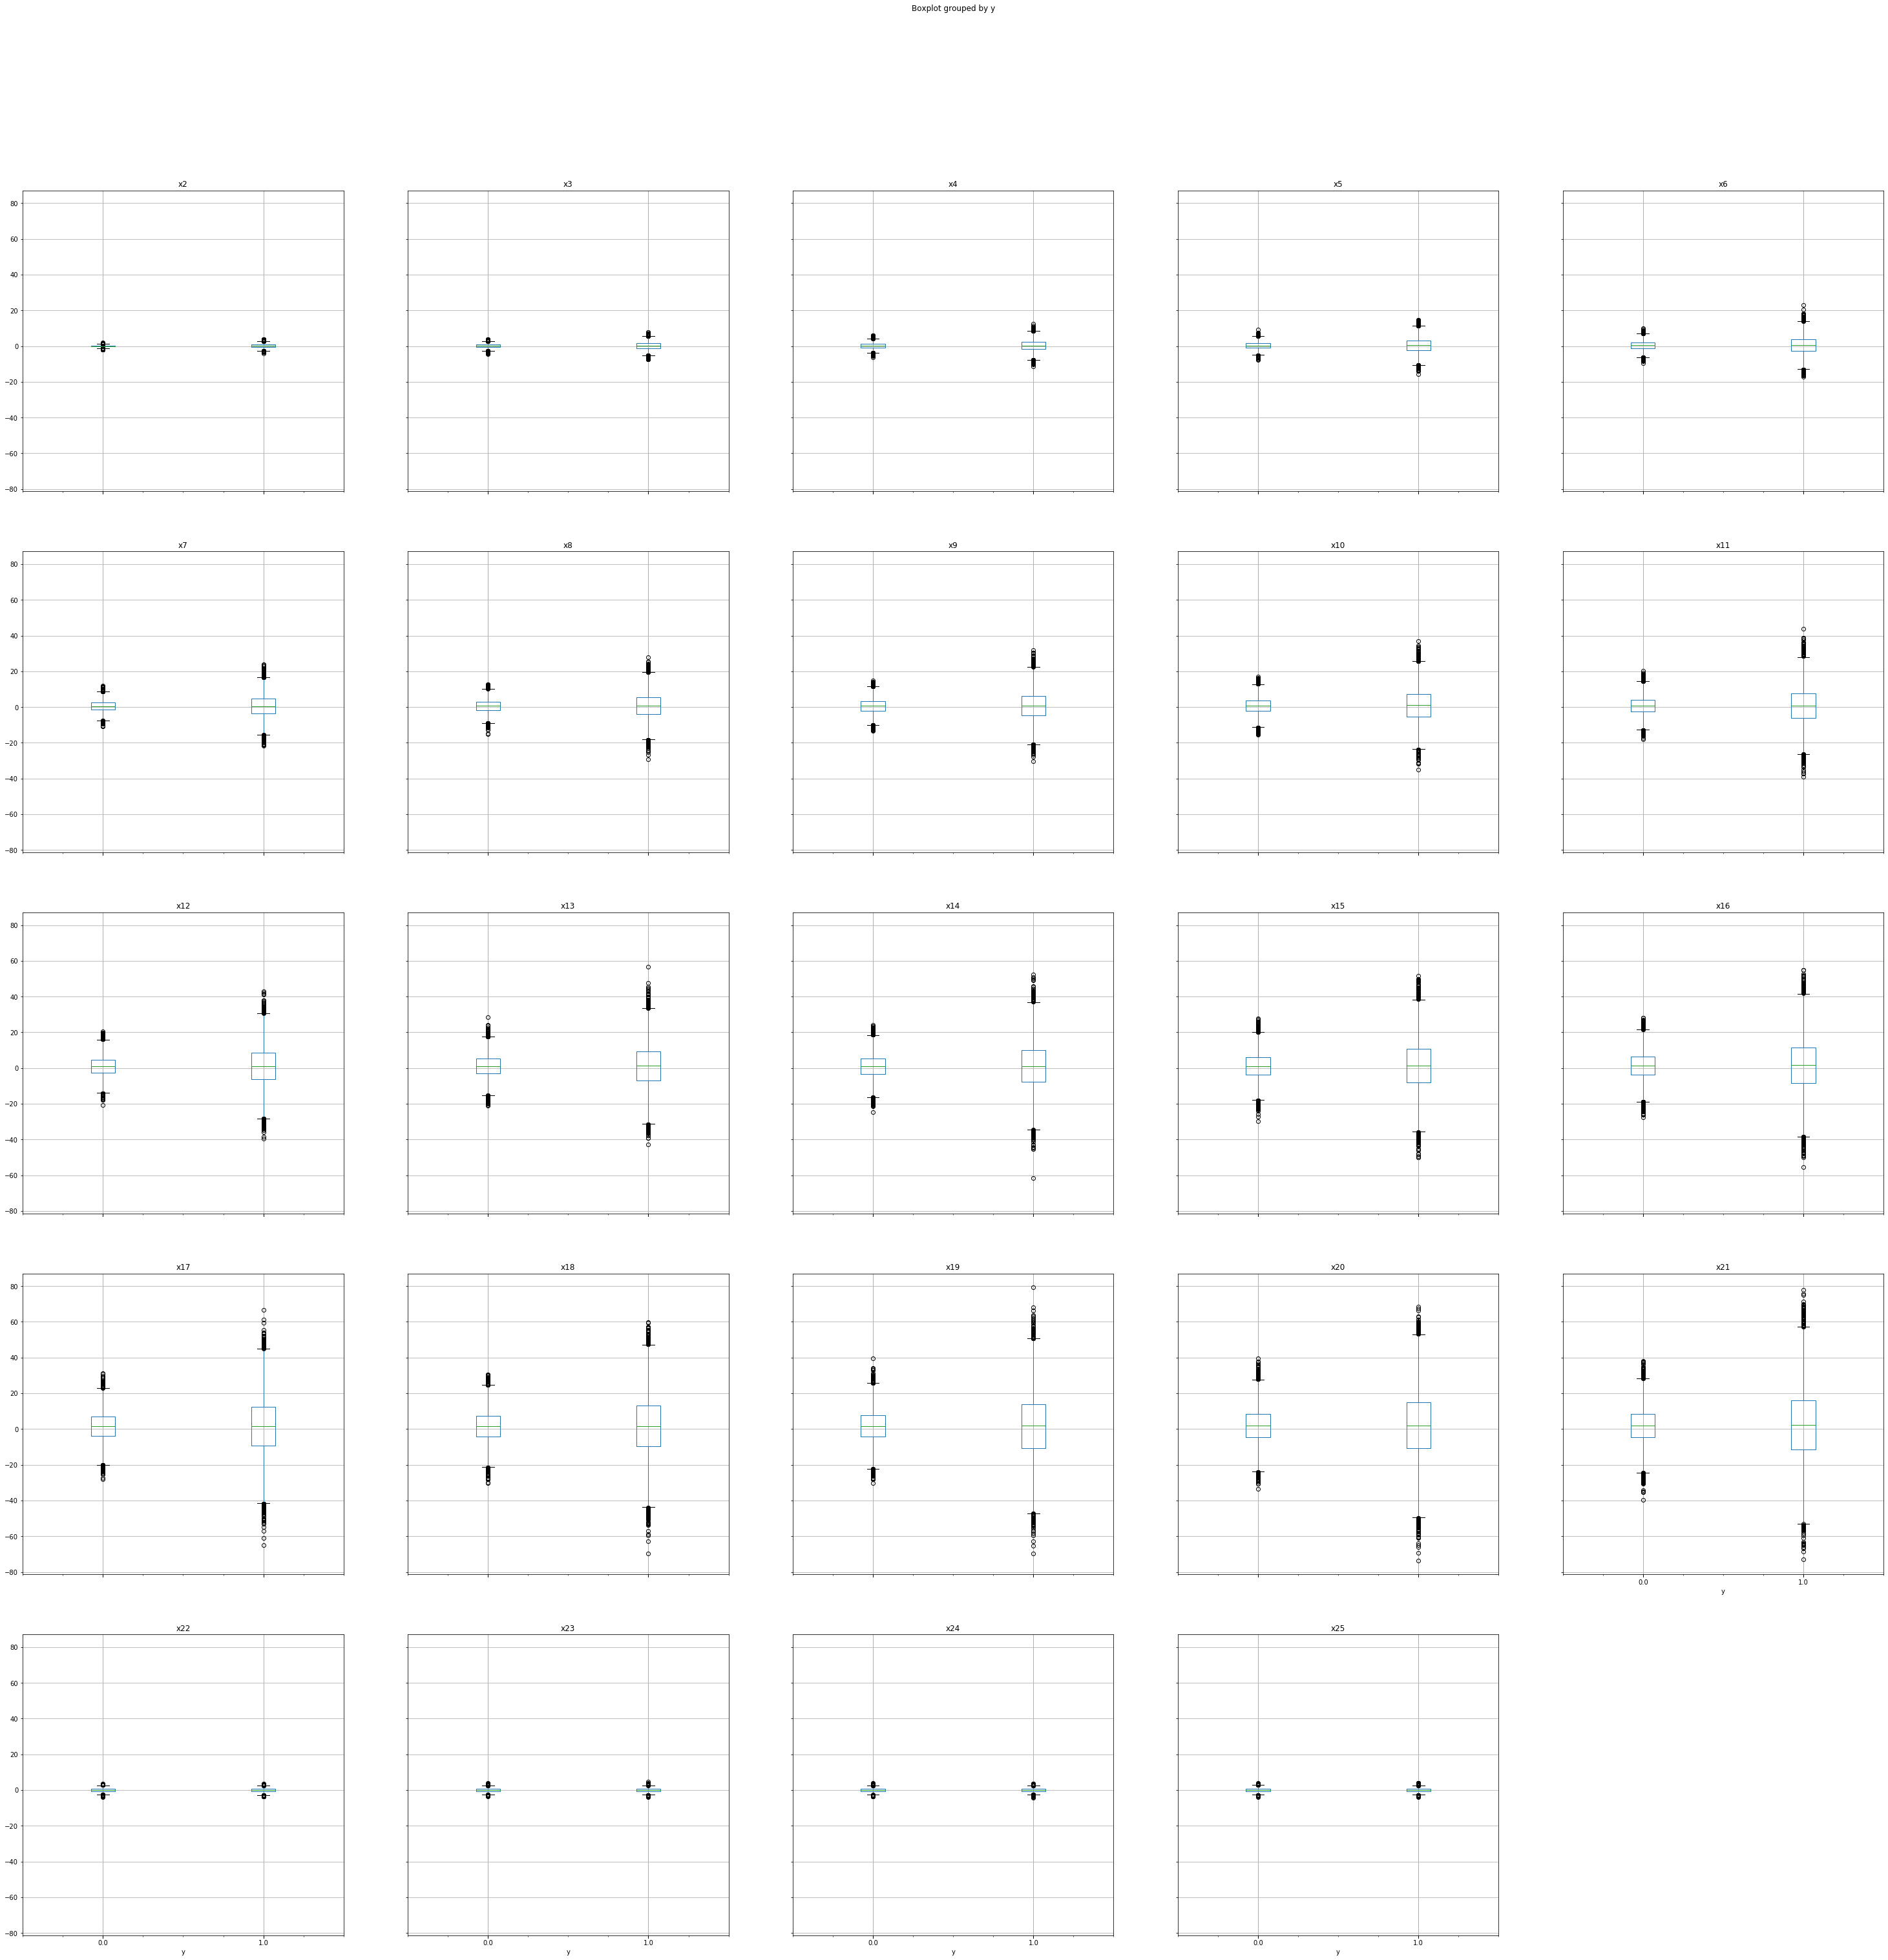

In [14]:
df.boxplot(column=['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25'], by='y')

# Outlier treatment

In [15]:
rs=RobustScaler()

X_new=df.drop('y', axis=1)
y=df['y']

X=rs.fit_transform(X_new)

In [16]:
X_new=pd.concat(((pd.DataFrame(X, columns=X_new.columns)), y), axis=1)

In [17]:
X_new.head()

,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,...,x20,x21,x22,x23,x24,x25,1.0,2.0,3.0,y
0,-0.233178,-2.578524,0.336642,1.391095,0.698736,-0.813395,0.315502,1.091776,0.197678,1.409109,...,0.035955,0.369230,0.204456,-1.025205,-0.759503,1.267362,0.0,0.0,1.0,1.0
1,1.739220,0.049363,-1.262708,-0.111302,-1.453277,-0.503932,-0.244974,-0.824894,0.194760,-1.239258,...,1.186299,1.667633,-0.795762,0.427149,-0.037847,-2.304017,0.0,1.0,0.0,1.0
2,0.842727,-0.024756,-0.515475,-0.578509,-0.673910,0.201003,-0.891383,-0.108013,0.305172,-0.304295,...,0.178961,-0.407826,-0.943111,-0.582897,0.387778,-0.655922,1.0,0.0,0.0,0.0
3,-0.305929,-0.069981,0.662952,-0.759144,-0.160541,0.701783,-0.121071,-0.016270,-1.000073,-0.236623,...,1.344860,0.538474,-0.448304,0.107773,-0.144270,0.401238,0.0,1.0,0.0,0.0
4,1.277269,0.828299,0.701517,0.718134,-0.100929,0.447183,0.321882,0.216902,-0.933420,-1.699878,...,0.634036,-0.663917,-0.075771,-0.706549,0.626443,1.065197,0.0,1.0,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24c54e10>,
      dtype=object)

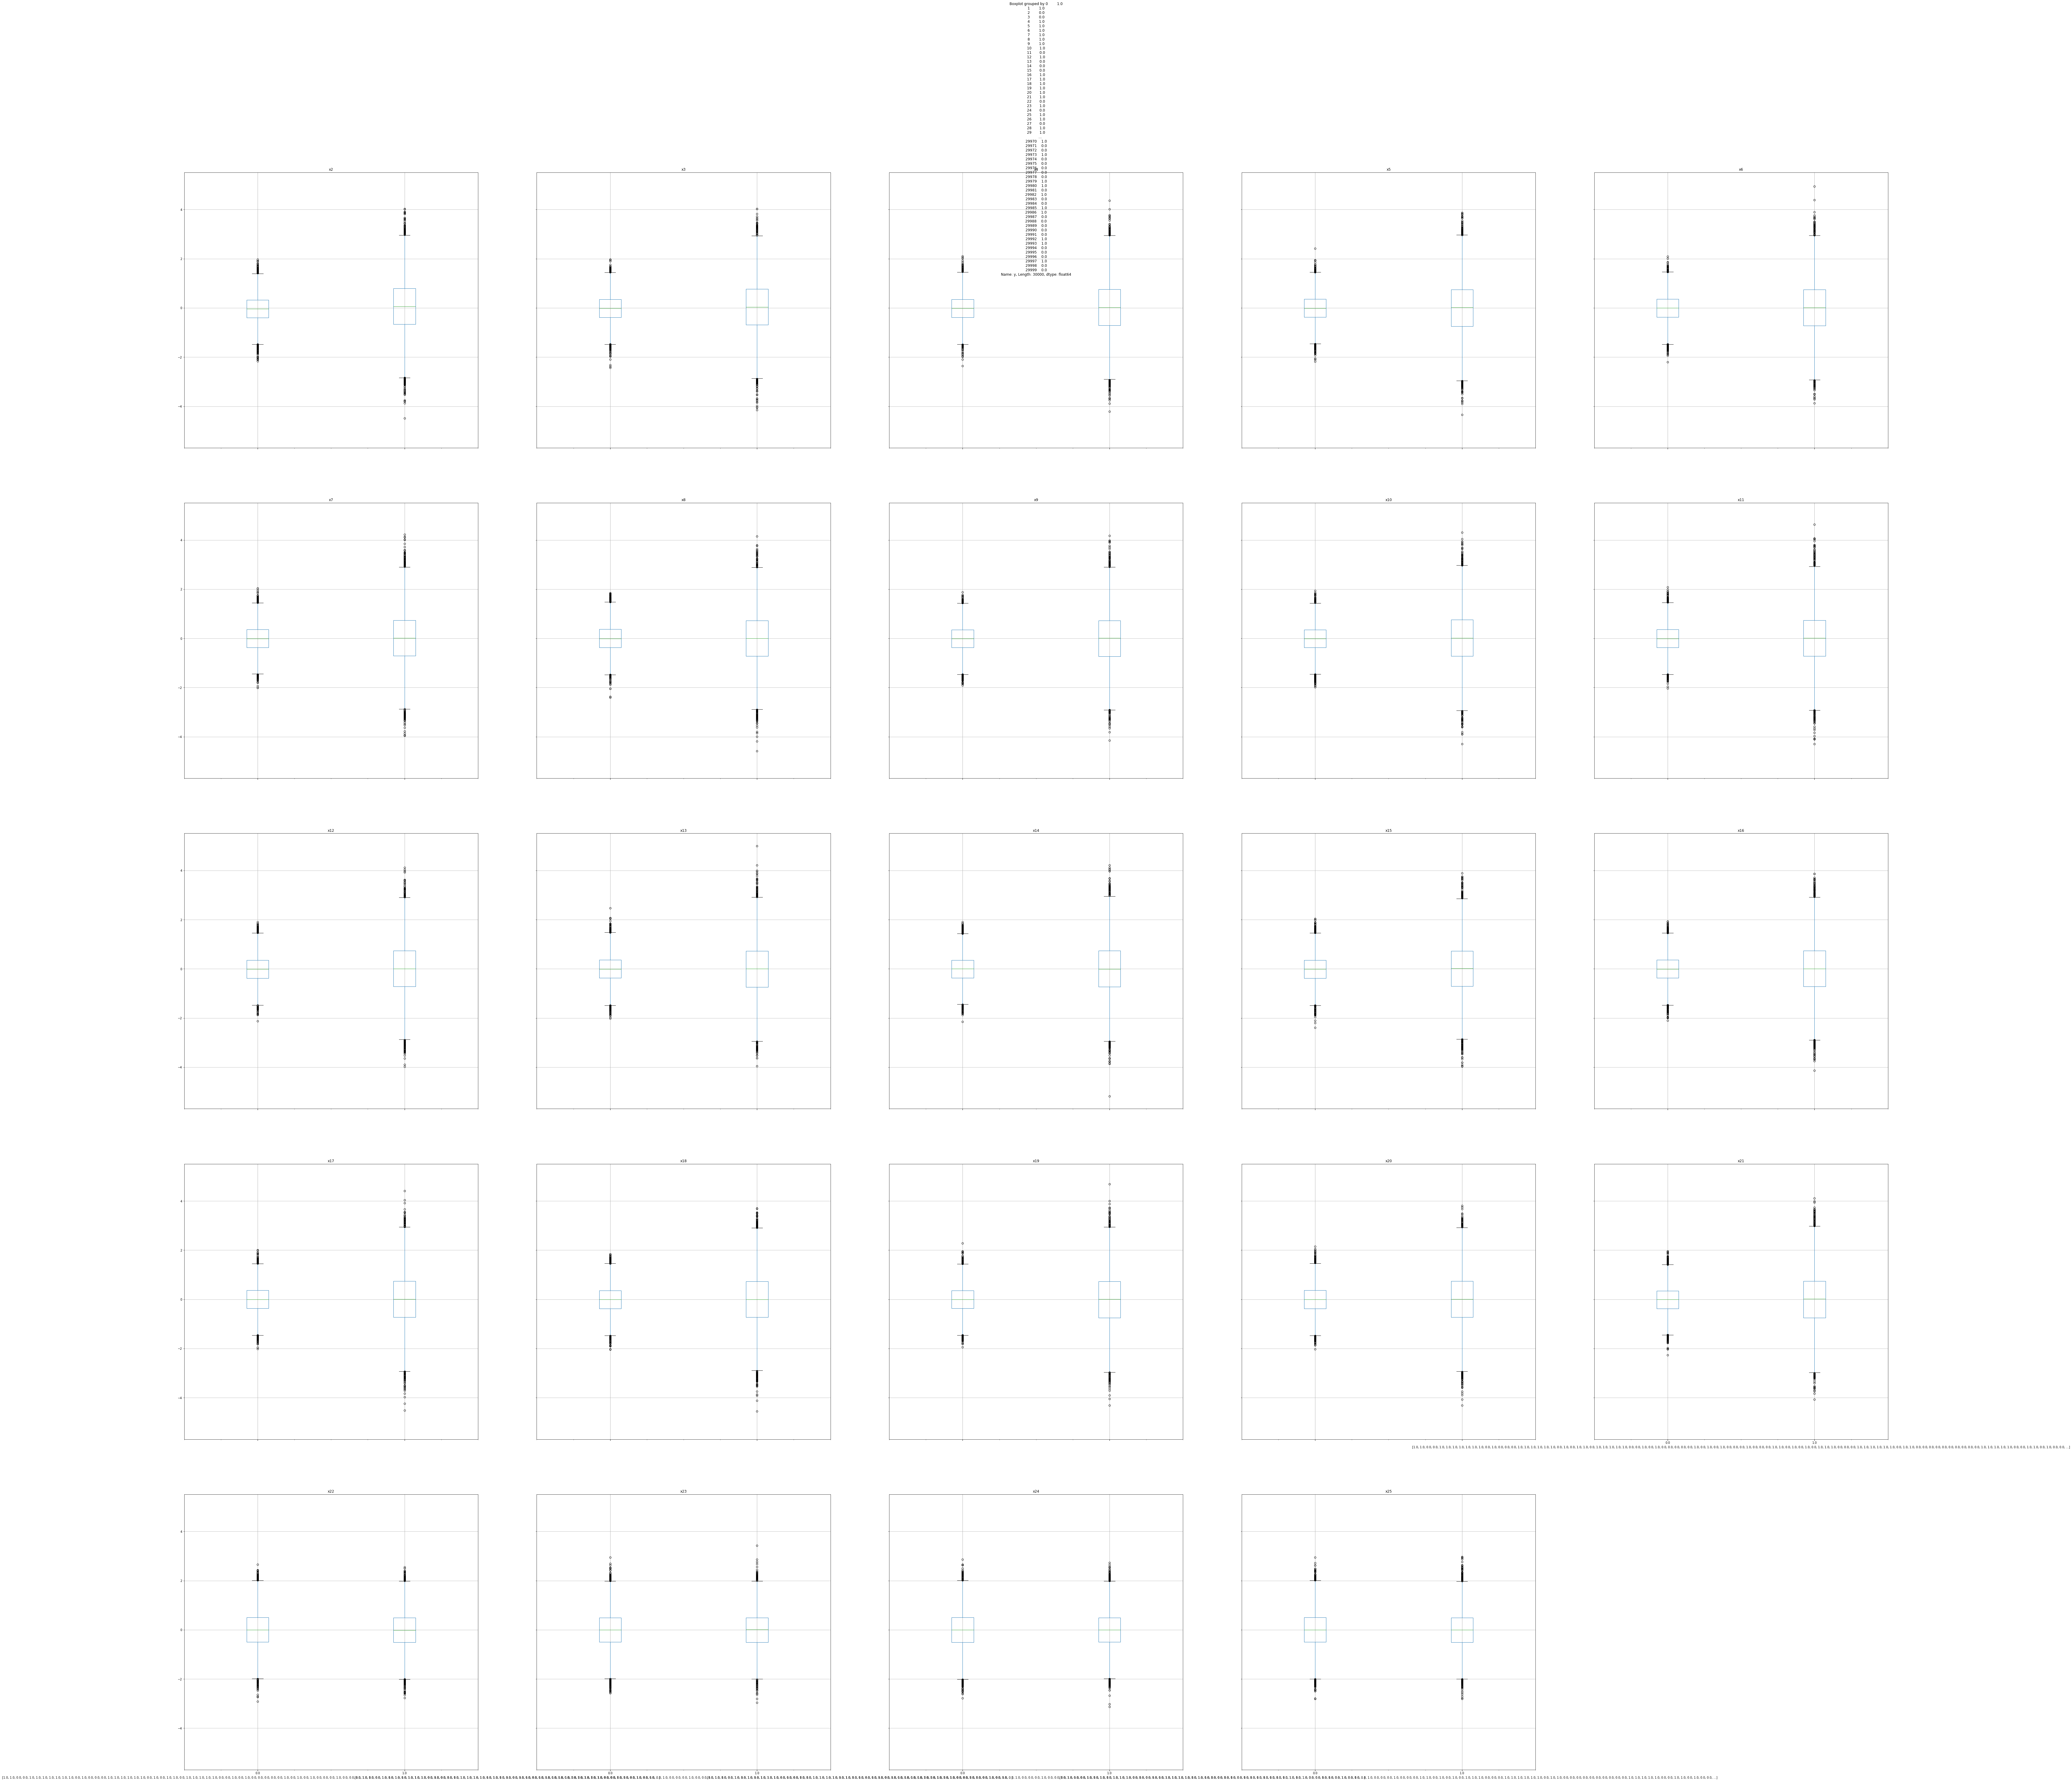

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 100,100
X_new.boxplot(column=['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12',
       'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22',
       'x23', 'x24', 'x25'], by=y)

# Random Forest Classifier

In [19]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

In [20]:
rfc=RandomForestClassifier(n_jobs=-1, max_depth=500,n_estimators=400)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=500, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
rfc2=RandomForestClassifier()
rfc_cv=cross_validate(rfc2, X, y, cv=3, scoring=scoring)
print(rfc_cv)

/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([1.27109408, 1.34372187, 1.29785991]), 'score_time': array([0.06831574, 0.05006909, 0.05013585]), 'test_accuracy': array([0.956 , 0.9596, 0.9555]), 'test_precision': array([0.94503995, 0.95012713, 0.94498634]), 'test_recall': array([0.96844418, 0.97024166, 0.96744558])}


In [22]:
rfc.feature_importances_

array([0.04283265, 0.04324812, 0.03921441, 0.0324698 , 0.02277524,
       0.02750363, 0.02538815, 0.0278766 , 0.02788446, 0.02673103,
       0.01949477, 0.02488019, 0.0236887 , 0.02315415, 0.02296658,
       0.01842398, 0.02127987, 0.02995915, 0.02013954, 0.03827661,
       0.00619207, 0.00620577, 0.00626778, 0.00597761, 0.26167656,
       0.06096656, 0.09452602])

In [23]:
from sklearn.feature_selection import SelectFromModel

In [24]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [25]:
imp=sel.get_support()

In [26]:
imp

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True])

In [27]:
lst=[]
for i in range(len(imp)):
    if imp[i]==True:
        lst.append(i)

In [28]:
lst

[0, 1, 2, 3, 19, 24, 25, 26]

In [29]:
X_new.iloc[:,lst]    # important features asper random forest

,x2,x3,x4,x5,x21,1.0,2.0,3.0
0,-0.233178,-2.578524,0.336642,1.391095,0.369230,0.0,0.0,1.0
1,1.739220,0.049363,-1.262708,-0.111302,1.667633,0.0,1.0,0.0
2,0.842727,-0.024756,-0.515475,-0.578509,-0.407826,1.0,0.0,0.0
3,-0.305929,-0.069981,0.662952,-0.759144,0.538474,0.0,1.0,0.0
4,1.277269,0.828299,0.701517,0.718134,-0.663917,0.0,1.0,0.0
5,-0.668460,0.711086,0.813426,1.388189,0.771389,0.0,0.0,1.0
6,0.073386,-0.826221,-1.056417,-1.720306,-0.641046,0.0,0.0,1.0
7,-0.906825,-0.298020,1.964665,-1.448607,2.335093,0.0,0.0,1.0
8,-0.398973,-0.394167,-0.696064,-0.265577,-1.696170,0.0,0.0,1.0
9,1.032120,-0.210556,0.211067,0.286359,1.433877,0.0,1.0,0.0


# Model1. Logistic Regression 

In [30]:
lr=LogisticRegression(n_jobs=-1)
lr_cv=cross_validate(lr, X, y, cv=3, scoring=scoring)
print(lr_cv)

/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


{'fit_time': array([0.64596415, 0.0604372 , 0.05827308]), 'score_time': array([0.01303482, 0.0105269 , 0.0105629 ]), 'test_accuracy': array([0.8456, 0.8527, 0.8489]), 'test_precision': array([0.81328026, 0.81769148, 0.81886173]), 'test_recall': array([0.89774316, 0.90832834, 0.89654484])}


/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [49]:
lr.fit(X,y)

/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr_prob=lr.predict(X)

In [86]:
lr_auc = roc_auc_score(y, lr_prob)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

In [62]:
ns_probs = [0 for _ in range(len(y))]
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)

In [57]:
lr_fpr, lr_tpr, _ = roc_curve(y, lr_prob)
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# Model 2. KNN

In [31]:
knn=KNeighborsClassifier(n_neighbors=10)
knn_cv=cross_validate(knn, X, y, cv=3, scoring=scoring)
print(knn_cv)

{'fit_time': array([0.03165126, 0.02355099, 0.02344108]), 'score_time': array([36.34923077, 36.7976017 , 36.71448398]), 'test_accuracy': array([0.6138, 0.618 , 0.6175]), 'test_precision': array([1., 1., 1.]), 'test_recall': array([0.22867985, 0.2370681 , 0.2360695 ])}


In [66]:
knn.fit(X,y)
knn_pred=knn.predict(X)
knn_fpr, knn_tpr, _ = roc_curve(y, knn_pred)

In [94]:
knn_auc = roc_auc_score(y, knn_pred)

print('KNN: ROC AUC=%.3f' % (knn_auc))

KNN: ROC AUC=0.673


# Model 3. SGD 

In [32]:
sgd=SGDClassifier(penalty='Elasticnet')
sgd_cv=cross_validate(sgd, X, y, cv=3, scoring=scoring)
print(sgd_cv)

{'fit_time': array([0.13603091, 0.13028383, 0.14244986]), 'score_time': array([0.01099396, 0.01006317, 0.01013708]), 'test_accuracy': array([0.8456, 0.8527, 0.8489]), 'test_precision': array([0.81328026, 0.81769148, 0.81886173]), 'test_recall': array([0.89774316, 0.90832834, 0.89654484])}


In [67]:
sgd.fit(X,y)
sgd_pred=sgd.predict(X)
sgd_fpr, sgd_tpr, _ = roc_curve(y, sgd_pred)

In [95]:
sgd_auc = roc_auc_score(y, sgd_pred)

print('SGD: ROC AUC=%.3f' % (sgd_auc))

SGD: ROC AUC=0.849


# Model4. GaussianNB

In [33]:
gnb=GaussianNB()
gnb_cv=cross_validate(gnb, X, y, cv=3, scoring=scoring)
print(gnb_cv)

{'fit_time': array([0.0215292 , 0.01343703, 0.01399589]), 'score_time': array([0.02708292, 0.01911497, 0.01818514]), 'test_accuracy': array([0.9703, 0.9724, 0.9718]), 'test_precision': array([0.95604183, 0.95745504, 0.95936224]), 'test_recall': array([0.98601957, 0.98881566, 0.98542041])}


In [68]:
gnb.fit(X,y)
gnb_pred=gnb.predict(X)
gnb_fpr, gnb_tpr, _ = roc_curve(y, gnb_pred)

In [96]:
gnb_auc = roc_auc_score(y, gnb_pred)

print('GaussianNB: ROC AUC=%.3f' % (gnb_auc))

GaussianNB: ROC AUC=0.971


# Model 5. MLP Classifier

In [34]:
mlp=MLPClassifier()
mlp_cv=cross_validate(mlp, X, y, cv=3, scoring=scoring)
print(mlp_cv)

{'fit_time': array([9.54959917, 9.23859406, 8.53414607]), 'score_time': array([0.03645897, 0.03535581, 0.03598499]), 'test_accuracy': array([0.9831, 0.9849, 0.9822]), 'test_precision': array([0.9838    , 0.98735448, 0.98049751]), 'test_recall': array([0.98242461, 0.98242461, 0.98402237])}


In [69]:
mlp.fit(X,y)
mlp_pred=mlp.predict(X)
mlp_fpr, mlp_tpr, _ = roc_curve(y, mlp_pred)

In [97]:
mlp_auc = roc_auc_score(y, mlp_pred)

print('MLP: ROC AUC=%.3f' % (mlp_auc))

MLP: ROC AUC=1.000


# Model.6 AdaBoost

In [35]:
ab=AdaBoostClassifier()
ab_cv=cross_validate(ab, X, y, cv=3, scoring=scoring)
print(ab_cv)

{'fit_time': array([2.82737994, 2.82857609, 2.85019112]), 'score_time': array([0.16395116, 0.16749096, 0.16953087]), 'test_accuracy': array([0.9738, 0.9746, 0.9737]), 'test_precision': array([0.97364743, 0.97826524, 0.9738314 ]), 'test_recall': array([0.97403635, 0.97084082, 0.97363691])}


In [70]:
ab.fit(X,y)
ab_pred=ab.predict(X)
ab_fpr, ab_tpr, _ = roc_curve(y, ab_pred)

In [98]:
ab_auc = roc_auc_score(y, ab_pred)

print('AdaBoost: ROC AUC=%.3f' % (ab_auc))

AdaBoost: ROC AUC=0.978


# Model 7. GradientBoostingClassifier

In [36]:
gbc=GradientBoostingClassifier()
gbc_cv=cross_validate(gbc, X, y, cv=3, scoring=scoring)
print(gbc_cv)

{'fit_time': array([4.76843715, 4.60058331, 4.86332703]), 'score_time': array([0.05673075, 0.04864097, 0.0521872 ]), 'test_accuracy': array([0.977 , 0.9769, 0.9762]), 'test_precision': array([0.97913741, 0.98086992, 0.98220425]), 'test_recall': array([0.97483523, 0.97283803, 0.97004194])}


In [71]:
gbc.fit(X,y)
gbc_pred=gbc.predict(X)
gbc_fpr, gbc_tpr, _ = roc_curve(y, gbc_pred)

In [99]:
gbc_auc = roc_auc_score(y, gbc_pred)

print('GradientBoosting: ROC AUC=%.3f' % (gbc_auc))

GradientBoosting: ROC AUC=0.983


# Model8. Voting Classifier

In [73]:
clf1 = MLPClassifier()
clf2 = GradientBoostingClassifier()
clf3 = GaussianNB()
eclf1 =VotingClassifier(estimators=[('mlp', clf1), ('gbc', clf2), ('gnb', clf3)], voting='soft')
scores=cross_validate(eclf1, X, y, cv=3, scoring=scoring)

In [74]:
eclf1.fit(X,y)
eclf1_pred=eclf1.predict(X)
eclf1_fpr, eclf1_tpr, _ = roc_curve(y, eclf1_pred)

/Users/ghost/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [101]:
eclf1_auc = roc_auc_score(y, eclf1_pred)

print('Voting Classifier : ROC AUC=%.3f' % (eclf1_auc))

Voting Classifier : ROC AUC=0.992


In [77]:
scores

{'fit_time': array([14.11881018, 14.79872584, 14.77464795]),
 'score_time': array([0.09175277, 0.09312797, 0.11305308]),
 'test_accuracy': array([0.984 , 0.9854, 0.9838]),
 'test_precision': array([0.98075779, 0.98368159, 0.98036883]),
 'test_recall': array([0.98741762, 0.98721789, 0.98741762])}

# Roc curves for all the classifiers

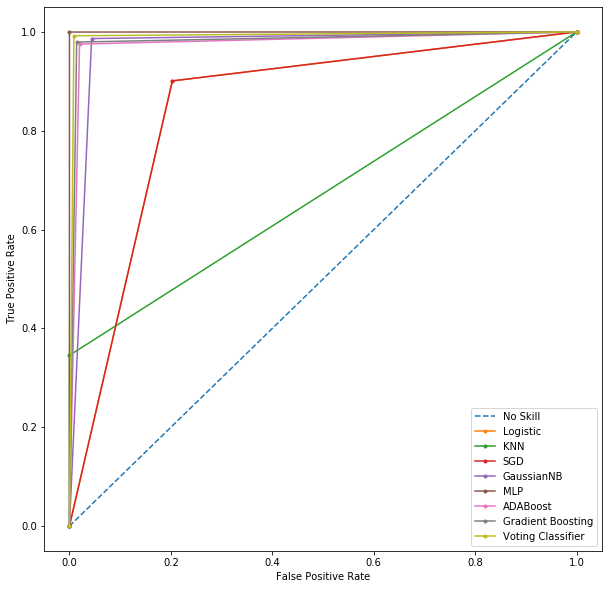

In [76]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='GaussianNB')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')
plt.plot(ab_fpr, ab_tpr, marker='.', label='ADABoost')
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boosting')
plt.plot(eclf1_fpr, eclf1_tpr, marker='.', label='Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy'],
    'n_estimators' : [100, 200, 600, 1000]
}
rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, verbose = 2, scoring='recall')

In [106]:
grid_search.fit(X,y)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=100 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=100, total=  13.2s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=100 .


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=100, total=  13.3s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=100 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=100, total=  13.2s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=200 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=200, total=  26.1s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=200 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=200, total=  26.8s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=200 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=200, total=  25.8s
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=600 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimators=600, total= 1.3min
[CV] bootstrap=True, criterion=gini, max_depth=100, n_estimators=600 .
[CV]  bootstrap=True, criterion=gini, max_depth=100, n_estimator

[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=600, total= 1.3min
[CV] bootstrap=True, criterion=entropy, max_depth=100, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=600, total= 1.4min
[CV] bootstrap=True, criterion=entropy, max_depth=100, n_estimators=600 
[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=600, total= 1.4min
[CV] bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000, total= 2.4min
[CV] bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000, total= 2.4min
[CV] bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000 
[CV]  bootstrap=True, criterion=entropy, max_depth=100, n_estimators=1000, total= 2.3min
[CV] bootstrap=True, criterion=entropy, max_depth=200, n_estimators=100 
[CV]  bootstrap=True, criter

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 103.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [107]:
grid_search.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 300, 'n_estimators': 600}

In [37]:
rfc3=RandomForestClassifier(bootstrap=True, criterion= 'gini', max_depth= 300, n_estimators=600, n_jobs=-1)

In [38]:
rfc3.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=300, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [39]:
test=pd.read_csv('480337_637209277472658423_test.csv')

In [40]:
dum=pd.get_dummies(test['x1'])

test=pd.concat((test,dum), axis=1)

test.pop('x1')

0       3.0
1       1.0
2       2.0
3       1.0
4       2.0
5       3.0
6       1.0
7       2.0
8       3.0
9       3.0
10      3.0
11      1.0
12      1.0
13      1.0
14      2.0
15      1.0
16      3.0
17      1.0
18      3.0
19      2.0
20      2.0
21      3.0
22      2.0
23      2.0
24      1.0
25      3.0
26      3.0
27      3.0
28      2.0
29      3.0
       ... 
9970    1.0
9971    1.0
9972    2.0
9973    2.0
9974    3.0
9975    2.0
9976    1.0
9977    3.0
9978    3.0
9979    1.0
9980    1.0
9981    2.0
9982    2.0
9983    3.0
9984    3.0
9985    2.0
9986    3.0
9987    1.0
9988    3.0
9989    2.0
9990    1.0
9991    3.0
9992    1.0
9993    1.0
9994    2.0
9995    3.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Name: x1, Length: 10000, dtype: float64

In [41]:
X_test=test.drop('y', axis=1)
y_test=test['y']

In [42]:
X_test=rs.fit_transform(X_test)

In [78]:
pred=rfc3.predict(X_test)

In [77]:
ns_probss = [0 for _ in range(len(y_test))]
ns_fpr1, ns_tpr1, _ = roc_curve(y_test, ns_probss)

In [80]:
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, pred)

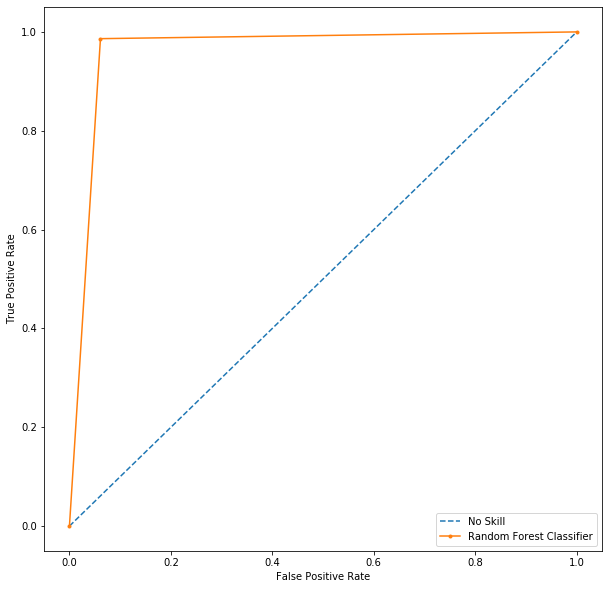

In [81]:
plt.plot(ns_fpr1, ns_tpr1, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [103]:
rfc_auc = roc_auc_score(y_test , pred)

print('Voting Classifier : ROC AUC=%.3f' % (rfc_auc))

Voting Classifier : ROC AUC=0.963


In [83]:
recall_score(y_test, pred)

0.9863426390841534

In [84]:
precision_score(y_test, pred)

0.9411651973936374